#Categorising the IMDB rating into 3 classes Hit,Avg,Flop
Here I have dataset named movie_metadata in which the target variable is IMDB score and other variables that decide the IMDB score. Instead of just IMDB score,With the help of other parameters I want to predict whether a movie is Hit,Avg or Flop.



|imdb_score | Classify |
| --- | ---|
|1-3 | Flop Movie|
|3-6 | Average Movie|
|6-10 | Hit Movie|


# 1 INTRODUCTION


## 1.1 Background


Success of a movie depends upon alot of factors like good directors or excellent actors or story plotline.However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.



## 1.2 Describing Data

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

|Variable Name |	Description|
| --- | --- |
|movie_title	 | Title of the Movie|
|duration	| Duration in minutes|
|director_name	| Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name |	Other actor starring in the movie|
|actor_2_facebook_likes	| Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users | 	Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|plot_keywords |	Keywords describing the movie plot|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color |	Film colorization. ‘Black and White’ or ‘Color’|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year |	The year in which the movie is released (1916:2016)|
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|movie_imdb_link |	IMDB link of the movie|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|

Lets see which features influence the target varible(IMDB Score)

# 2 DATA EXPLORATION

## 2.1 Importing necessary Libraries


In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading the dataset
data=pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2.2 Categorizing the target varible 

Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.


In [3]:
#Categorising the target varible 
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

 Barplot of imbd_binned column

Text(0.5, 1.0, 'Categorization of Movies')

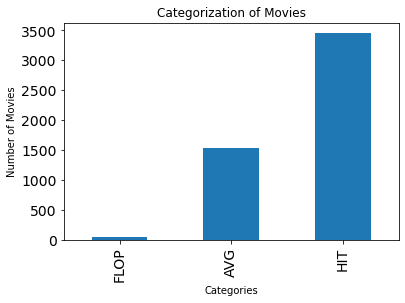

In [4]:
data.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

We can see a new column named imdb_binned correctly categorising the imdb score


In [5]:
#Checking the new column
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [6]:
#Shape of the dataset
data.shape

(5043, 29)

## 2.3 Handling the Missing values

Every datset have some missing values, lets find out in which cloumns they are?

In [7]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_binned                    0
dtype: int64

Dropping all the samples that having missing values


In [8]:
#Droping the samples that have missing values
data.dropna(inplace=True)

Total samples remaining after dropping missing values


In [9]:
#Final shape of the data after Droping missing values
data.shape

(3756, 29)

In [10]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_binned'],
      dtype='object')

In [11]:
data.shape

(3756, 29)

Lets find out how the string variables are behaving

In [12]:
#Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Home,Steve Coogan,eighteen wheeler|illegal street racing|truck|t...,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,English,USA,R
freq,3632,25,20,147,42,3,8,3,3,3598,2987,1700


'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable

In [13]:
#Dropping 2 columns
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

## 2.4 Label Encoding

All the categorical columns and the columns with text data are being Label Encodeded in this step.

In [14]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [15]:
#A sample of data after label encoding
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,91,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,HIT
2,1,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,107,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,HIT
3,1,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,105,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,HIT


## 2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.



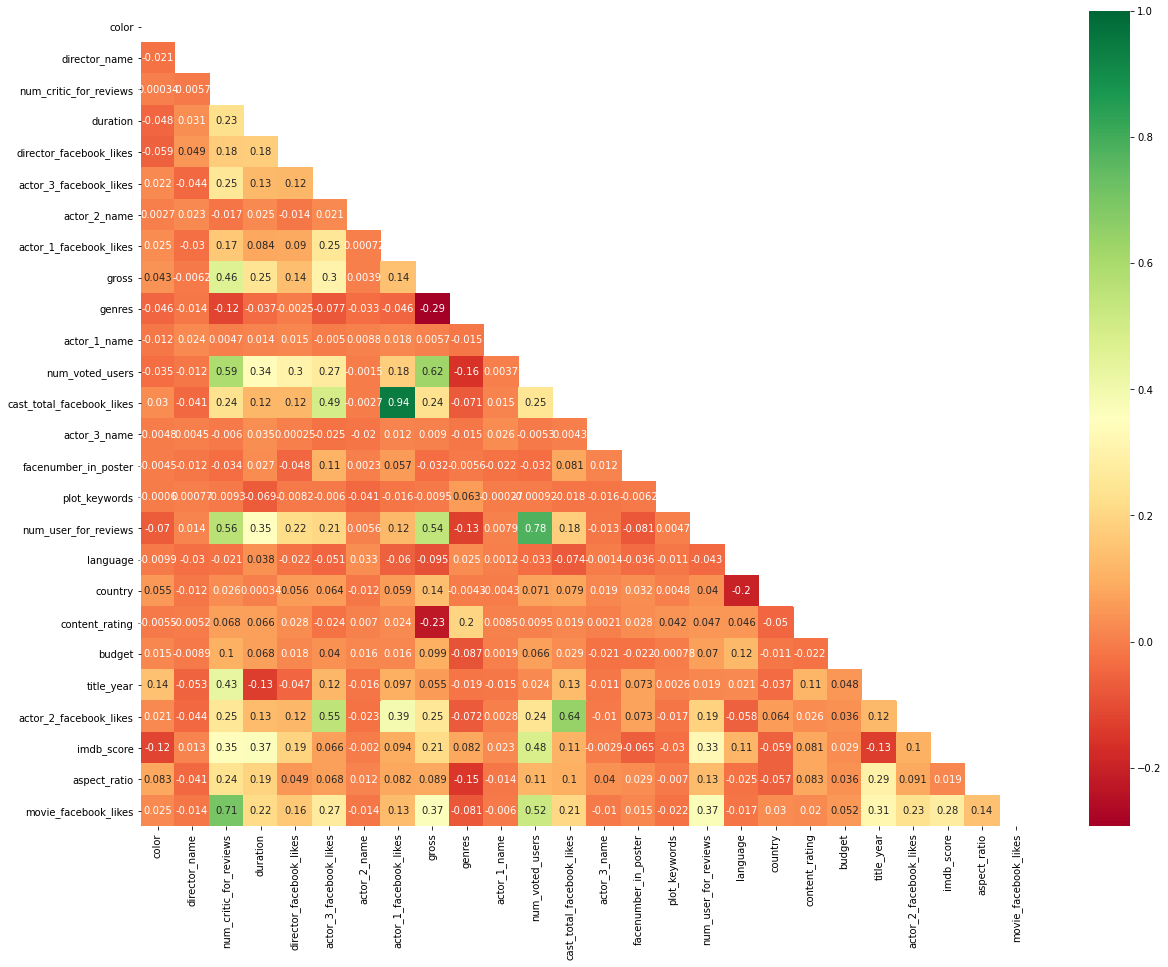

In [16]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

These variables that are correlated cause errors in the prediction, so removing them


In [17]:
#Removing few columns due to multicollinearity
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

Removing the column "imdb_score" since we have "imdb_binned

I am gonna train the model with imdb_binned not with imdb_score so dropping the column.


In [18]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['imdb_score'],inplace=True)

In [19]:
data.shape

(3756, 24)

# 3 CLASSIFICATION MODEL BUILDING

Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.


In [20]:
#Independent Variables
X = data.iloc[:, 0:23].values
#Dependent/Target Variable
y = data.iloc[:, 23].values
y

[HIT, HIT, HIT, HIT, HIT, ..., HIT, HIT, HIT, HIT, HIT]
Length: 3756
Categories (3, object): [FLOP < AVG < HIT]

## 3.1 Train Test Split

We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function in Sklearn library called test_train_split, lets use that.

In [21]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(2629, 23)
(2629,)


In [22]:
print(X_test)

[[1.000e+00 1.509e+03 1.390e+02 ... 6.830e+02 8.000e+00 0.000e+00]
 [1.000e+00 1.410e+03 9.300e+01 ... 8.480e+02 8.000e+00 1.600e+02]
 [1.000e+00 6.360e+02 9.500e+01 ... 1.000e+03 1.200e+01 1.000e+04]
 ...
 [1.000e+00 7.810e+02 1.100e+02 ... 1.000e+03 1.200e+01 0.000e+00]
 [1.000e+00 4.620e+02 1.550e+02 ... 1.200e+04 8.000e+00 1.400e+04]
 [1.000e+00 1.288e+03 1.050e+02 ... 6.240e+02 8.000e+00 4.910e+02]]


## 3.2 Scaling

Few variables will be in the range of Millions and some in Tens, lets bring all of them into same scale


In [23]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.4 Feature Selection using RFECV



Finding optimal features to use for Machine learning model training can sometimes be a difficult task to accomplish.There are just so many methods to choose from and here I am going with RFECV.

Recursive Feature Elimination  with Cross Validation

Recursive — involving doing or saying the same thing several times in order to produce a particular result or effect

Feature — individual measurable property or characteristic of a phenomenon being observed — an  attribute in your dataset

Cross-Validation — a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

You will need to declare two variables — X and y where first represents all the features, and the second represents the target variable. Then you’ll make an instance of the Machine learning algorithm (In this case RandomForests). In it, you can optionally pass a random state seed for reproducibility. Now you can create an instance of RFECV.




In [24]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
clf_rf=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [25]:
print(rfecv)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=0),
      scoring='neg_log_loss')


In [26]:
#Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Int64Index([2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 18, 19, 20, 22], dtype='int64')


|Features Selected |	Features Dropped|
| --- | --- |
|duration| color|
|director_facebook_likes	| director name|
|actor_3_facebook_likes	| actor_2_name|
|actor_1_facebook_likes|	actor_1_name   |
|gross|	facenumber_in_poster|
|genres |	language|
|num_voted_users |country	|
|actor_3_name 	| content_rating|
|actor_3_name |	aspect_ratio|
|plot_keywords |	|
|num_user_for_reviews |	 |
|budget| |
|title_year | 	|
|actor_2_facebook_likes |	 |
|movie_facebook_likes |	 |


In [27]:
#Feauture Ranking
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


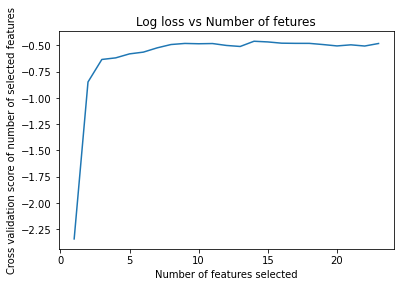

In [28]:
#Logloss vs Number of features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.title("Log loss vs Number of fetures")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
#Selecting the Important Features
X_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:,X_test.columns[rfecv.support_]]

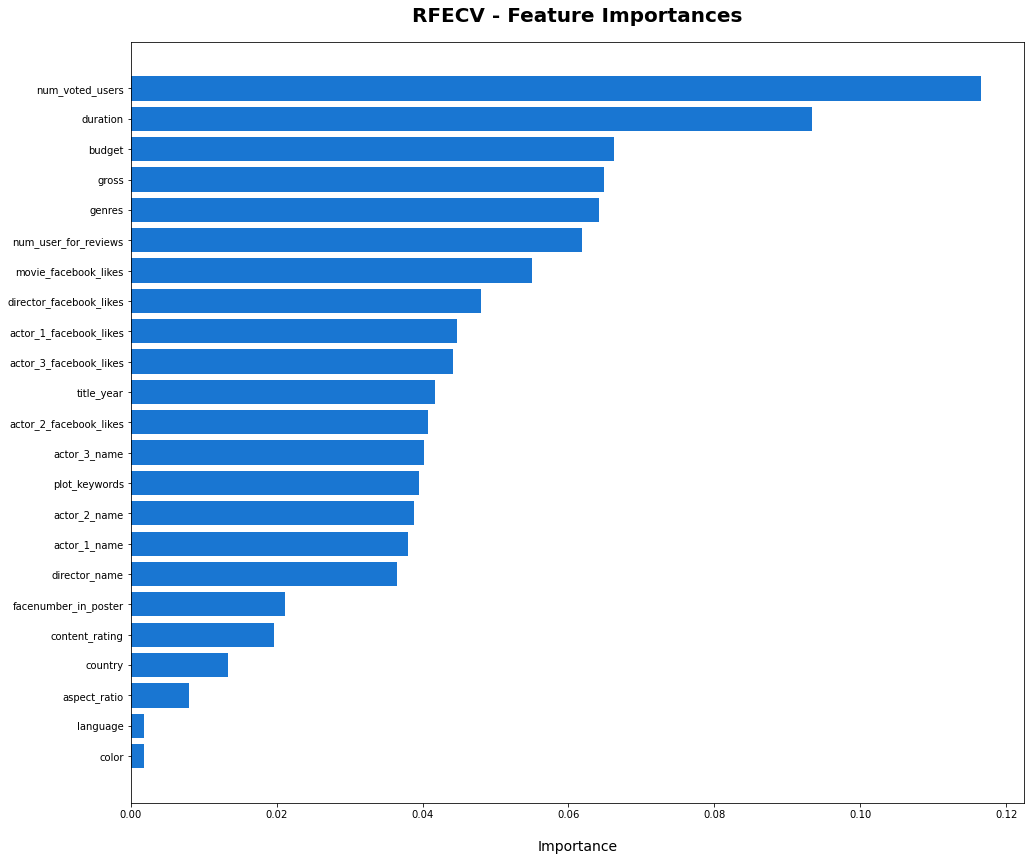

In [30]:
#Creating anew dataframe with column names and feature importance
dset = pd.DataFrame()
data1 = data
data1.drop(columns=['imdb_binned'],inplace=True)
dset['attr'] = data1.columns

dset['importance'] = clf_rf.feature_importances_
#Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## 3.4 Random Forest

Random forests is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification)  of the individual trees

*n_estimators* is a parameter that specify number of trees in the forest.

*criterion* is to specify what function to measure the quality of a split. “entropy” is for the information gain. 

In [31]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_opt, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

Predicting the test data

In [32]:
#Predicting the target variable
y_pred = classifier.predict(X_test)

## 3.5 Confusion Matrix

Confusion matrix gives a clear view of ground truth and prediction.

In [33]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[188,   0, 147],
       [  6,   0,   2],
       [ 68,   0, 716]])

## 3.6 Classification Report

In [34]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.72      0.56      0.63       335
        FLOP       0.00      0.00      0.00         8
         HIT       0.83      0.91      0.87       784

    accuracy                           0.80      1127
   macro avg       0.52      0.49      0.50      1127
weighted avg       0.79      0.80      0.79      1127



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(X_test)

            2         3         4         6         7         8         10  \
0     1.252924  3.888952 -0.160676  0.324833  0.252724  1.220505  0.349787   
1    -0.753872 -0.263002 -0.079622 -0.423907 -0.761471  0.622243 -0.663870   
2    -0.666620 -0.248303 -0.151490  0.015283 -0.662649  0.399634 -0.014939   
3    -0.230360 -0.251498 -0.127174  0.139103  0.015683  0.172387  0.267261   
4     0.554908 -0.224975  0.130580  0.634383  0.409914  0.789200  0.539055   
...        ...       ...       ...       ...       ...       ...       ...   
1122 -0.710246 -0.252776 -0.400058 -0.475230 -0.631203  1.234418  0.157912   
1123  1.252924 -0.247663 -0.266047 -0.456348  0.715061  0.455286 -0.003217   
1124 -0.012230 -0.222419  0.019805  0.943933 -0.494919 -1.807908 -0.285823   
1125  1.950939 -0.265239  4.993861  0.634383  0.429594  1.276157  0.231768   
1126 -0.230360 -0.226573 -0.218495 -0.294267 -0.616200  0.399634 -0.659528   

            11        13        14        18        19        2

In [36]:
print(classifier.predict(X_test.iloc[:10]))

['HIT' 'AVG' 'HIT' 'HIT' 'HIT' 'HIT' 'HIT' 'HIT' 'HIT' 'HIT']
